Sobre o conjunto de dados
- O conjunto de dados se refere a venda dos carros usados ao longo dos anos, como a marca, a quilometragem e o Estado de localização. 
Para este conjunto de dados, irei fazer uma análise e criar modelos de  predição.

# Importando Bibliotecas

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [74]:
dados = pd.read_csv('/content/true_car_listings.csv')

# Informações dos Dados

In [75]:
dados.sample(3)

,Price,Year,Mileage,City,State,Vin,Make,Model
391404,17994,2016,27316,Cookeville,TN,2HGFC4B00GH306161,Honda,Civic
183525,57350,2017,23842,Orchard Park,NY,1GNSKCKC0HR146148,Chevrolet,TahoePremier
641255,13999,2012,22513,Las Cruces,NM,1N4AL2APXCN571642,Nissan,Altima4dr


In [76]:
def info_data(data):
  print('============== TAMANHO DADOS ==============')
  print('Linhas',data.shape[0])
  print('Colunas',data.shape[1])
  print('Dados duplicados',data.duplicated().sum())

  tabela = pd.DataFrame({
      'ValUni':data.nunique(),
      'ValNull':data.isnull().sum(),
      'ValNullPercent':data.isna().sum() / len(data)*100,
      'ValType':data.dtypes.values
  })
  print('============== TABELA INFORMAÇÃO DADOS ==============')
  display(tabela)
  print('-'*70)
  print('============== DESCRIÇÃO DADOS ==============')
  display(data.describe())

In [77]:
info_data(dados)

============== TAMANHO DADOS ==============
Linhas 852122
Colunas 8
Dados duplicados 30
============== TABELA INFORMAÇÃO DADOS ==============


,ValUni,ValNull,ValNullPercent,ValType
Price,47124,0,0.0,int64
Year,22,0,0.0,int64
Mileage,158836,0,0.0,int64
City,2553,0,0.0,object
State,59,0,0.0,object
Vin,852075,0,0.0,object
Make,58,0,0.0,object
Model,2736,0,0.0,object


----------------------------------------------------------------------
============== DESCRIÇÃO DADOS ==============


,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [78]:
dados.drop_duplicates(inplace=True)
dados.dropna(inplace=True)

In [79]:
def colunas_type(data):
  categoria = data.select_dtypes(include='object').columns
  numerico = data.select_dtypes(exclude='object').columns
  print(categoria)
  print()
  print(numerico)
  print('----------- Colunas Categóricas -----------')
  for cat in categoria:
    print(data[cat].value_counts())
    print('-'* 40)
  print('='*70)
  print('----------- Colunas Numéricas -----------')
  for num in numerico:
    print(data[num].value_counts())
    print('-'*40)

In [80]:
colunas_type(dados)

Index(['City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

Index(['Price', 'Year', 'Mileage'], dtype='object')
----------- Colunas Categóricas -----------
Houston          12701
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64
----------------------------------------
 TX    94646
 CA    80436
 FL    72527
 GA    39413
 IL    38680
 NC    37529
 VA    35011
 PA    28129
 NY    27932
 NJ    27852
 OH    23259
 WA    23149
 CO    23002
 AZ    22399
 TN    19163
 MA    17990
 MD    17571
 IN    16462
 MO    16163
 KY    13691
 AL    13292
 WI    11255
 MN    10996
 CT    10906
 UT    10418
 OR    10352
 MI    10328
 SC     9789
 OK     9584
 LA     8528
 KS     7894
 AR     6952
 NV     6887
 MS     6242
 NH     5694
 NE     4924
 IA     4840
 NM     4729
 ID     350

In [81]:
categorias = ['City', 'State', 'Vin', 'Make', 'Model']
for cat in categorias: 
  print(dados[cat].value_counts())
  print('-'*40)

Houston          12701
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64
----------------------------------------
 TX    94646
 CA    80436
 FL    72527
 GA    39413
 IL    38680
 NC    37529
 VA    35011
 PA    28129
 NY    27932
 NJ    27852
 OH    23259
 WA    23149
 CO    23002
 AZ    22399
 TN    19163
 MA    17990
 MD    17571
 IN    16462
 MO    16163
 KY    13691
 AL    13292
 WI    11255
 MN    10996
 CT    10906
 UT    10418
 OR    10352
 MI    10328
 SC     9789
 OK     9584
 LA     8528
 KS     7894
 AR     6952
 NV     6887
 MS     6242
 NH     5694
 NE     4924
 IA     4840
 NM     4729
 ID     3501
 HI     2995
 DE     2418
 MT     1984
 ME     1920
 RI     1858
 AK     1663
 WV     1501
 SD     1267
 VT     1123
 ND     1092
 Fl      783
 WY      610
 Va 

In [82]:
dados.select_dtypes(exclude='object').columns

Index(['Price', 'Year', 'Mileage'], dtype='object')

In [83]:
numericas = ['Price', 'Year', 'Mileage']
for num in numericas: 
  print(dados[num].value_counts())
  print('-'*40)

14995    4898
12995    4600
13995    4591
9995     4298
15995    4282
         ... 
53385       1
52277       1
64521       1
45506       1
60240       1
Name: Price, Length: 47124, dtype: int64
----------------------------------------
2014    162424
2015    157513
2016    132128
2017     91603
2013     74697
2012     49764
2011     39768
2010     27538
2008     24712
2007     21171
2009     19061
2006     15079
2005     11005
2004      8117
2003      5649
2002      3800
2001      2584
2000      1933
1999      1254
2018       922
1998       774
1997       596
Name: Year, dtype: int64
----------------------------------------
10        635
5         350
11        232
12        213
15        183
         ... 
235319      1
108621      1
138824      1
260012      1
392123      1
Name: Mileage, Length: 158836, dtype: int64
----------------------------------------


# Visualizando os Dados

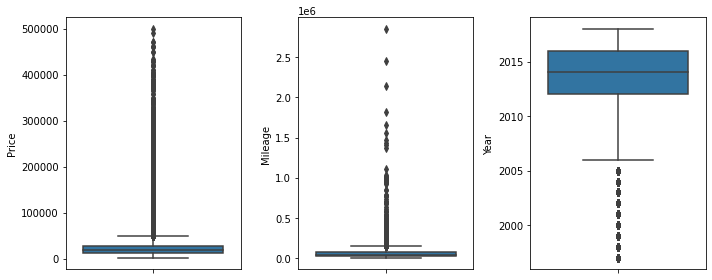

In [84]:
# Box plot do Price, Mileage e Year
fig, axes = plt.subplots(1,3,figsize=(10,4))

sns.boxplot(y=dados['Price'],ax=axes[0])

sns.boxplot(y=dados['Mileage'],ax=axes[1])

sns.boxplot(y=dados['Year'],ax=axes[2])

plt.tight_layout()
plt.show()

## Preço ao longo dos anos

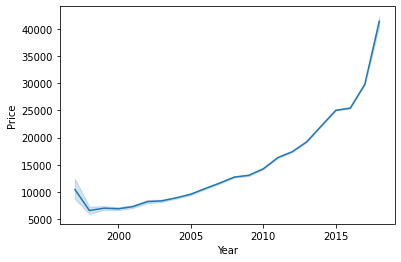

In [119]:
# Preço ao longo dos anos
sns.lineplot(x=dados['Year'], y=dados['Price'])

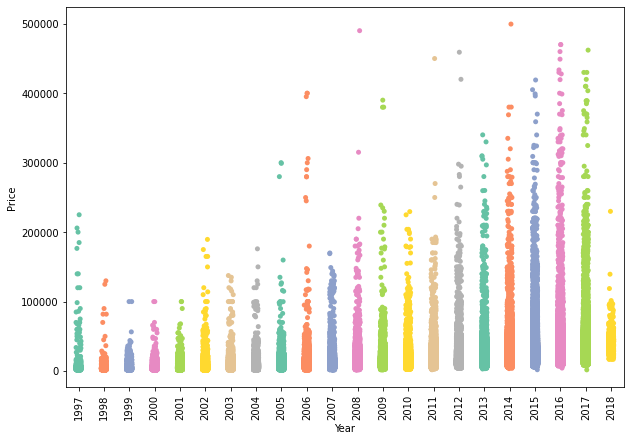

In [120]:
# qual o ano que teve o valor máximo de preço?
plt.figure(figsize=(10,7))
sns.stripplot(x=dados['Year'], y=dados['Price'], palette='Set2')
plt.xticks(rotation=90);
plt.show()

Preço total


,Year,Price
18,2015,3941602880
17,2014,3597185781
19,2016,3360920405
20,2017,2730058992
16,2013,1436601865
15,2012,866193595
14,2011,648604576
13,2010,392512412
11,2008,314515384
12,2009,248716410


------------------------------
Média do Preço


,Year,Price
21,2018,41397.838395
20,2017,29803.161381
19,2016,25436.852181
18,2015,25023.984560
17,2014,22146.885811
16,2013,19232.390391
15,2012,17406.028354
14,2011,16309.710722
13,2010,14253.482896
12,2009,13048.444992


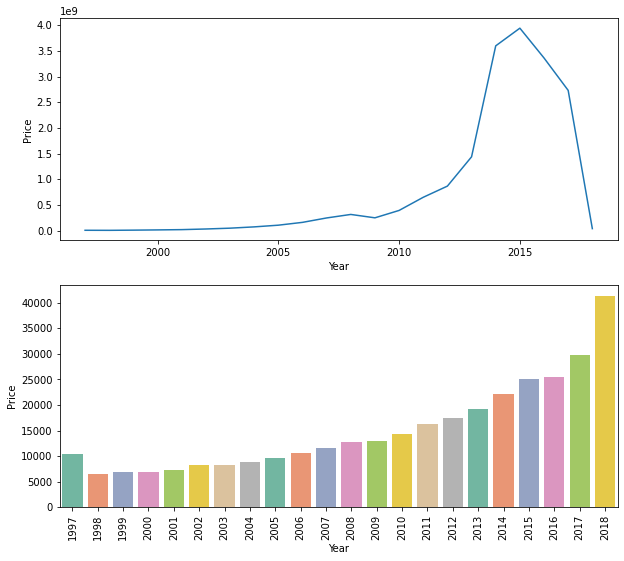

In [121]:
# Ano das Vendas
ano_vendas = dados[['Price','Year']].groupby('Year').sum().reset_index()
ano_vendas_mean = dados[['Price','Year']].groupby('Year').mean().reset_index()
# Total das Vendas
print('Preço total')
display(ano_vendas.sort_values('Price',ascending=False))
# Média das Vendas
print('-'*30)
print('Média do Preço')
display(ano_vendas_mean.sort_values('Price',ascending=False))

# configuração do gráfico
fig,axes  = plt.subplots(2,1,figsize=(10,9))

# gráfico
sns.lineplot(x=ano_vendas['Year'], y=ano_vendas['Price'],ax=axes[0])
sns.barplot(x=ano_vendas_mean['Year'], y=ano_vendas_mean['Price'],ax=axes[1], palette='Set2')
plt.xticks(rotation=90);

plt.show()

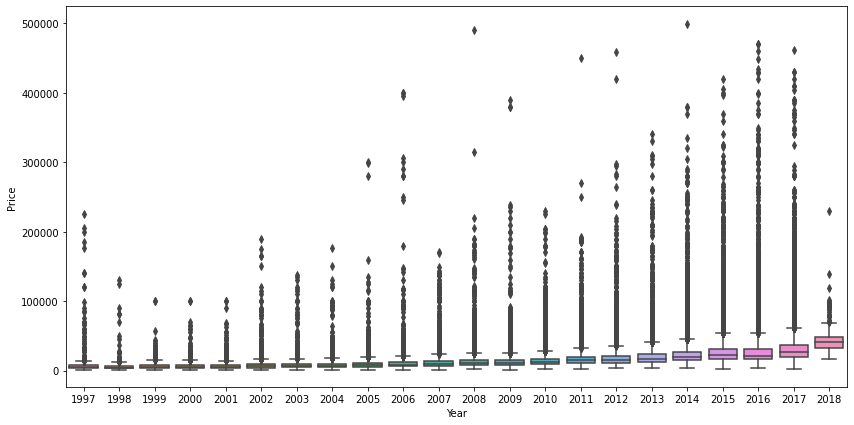

In [122]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Year'], y=dados['Price'])

## Qual a cidade e estado mais frequente?

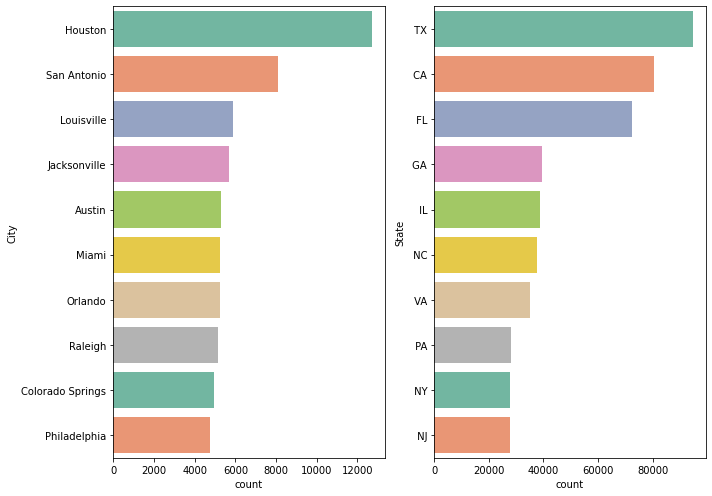

In [88]:
# frequência de cidade e Estado
fig, axes = plt.subplots(1,2,figsize=(10,7))

sns.countplot(y=dados['City'],order=dados['City'].value_counts().index[0:10],ax=axes[0], palette='Set2')
sns.countplot(y=dados['State'],order=dados['State'].value_counts().index[0:10],ax=axes[1], palette='Set2')

plt.tight_layout()
plt.show()

## Qual a marca de carro mais cara?

In [89]:
# Preço total por marca
marca_vendas = dados[['Make','Price']].groupby('Make').sum()
# Média do preço por marca
marca_vendas_mean = dados[['Make','Price']].groupby('Make').mean()

print('Preço Total por Marca')
display(marca_vendas.sort_values('Price',ascending=False))
print('-'*40)
print('Média do Preço por Marca')
display(marca_vendas_mean.sort_values('Price',ascending=False))

Preço Total por Marca


,Price
Make,
Ford,2363876755
Chevrolet,2258850630
Toyota,1524717253
Nissan,1108119397
Jeep,910856907
BMW,872634901
Honda,840179771
Mercedes-Benz,835391504
GMC,825306972


----------------------------------------
Média do Preço por Marca


,Price
Make,
McLaren,222232.234043
Rolls-Royce,202772.836957
Ferrari,201742.968116
Lamborghini,191648.272727
Bentley,101075.310627
Aston,99573.617450
Maybach,87294.300000
Tesla,62679.151515
AM,59934.210526


## Qual marca de carro mais frequente?

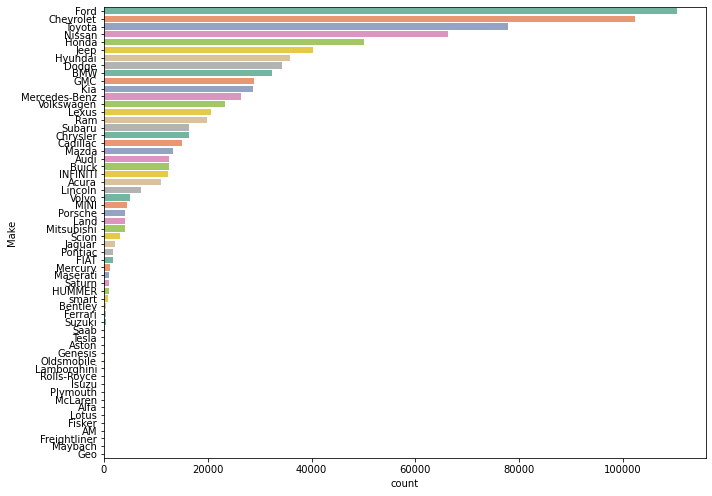

In [90]:
# frequência de carros
plt.figure(figsize=(10,7))
sns.countplot(y=dados['Make'], order=dados['Make'].value_counts().index, palette='Set2')
plt.tight_layout()

## Preço por marca

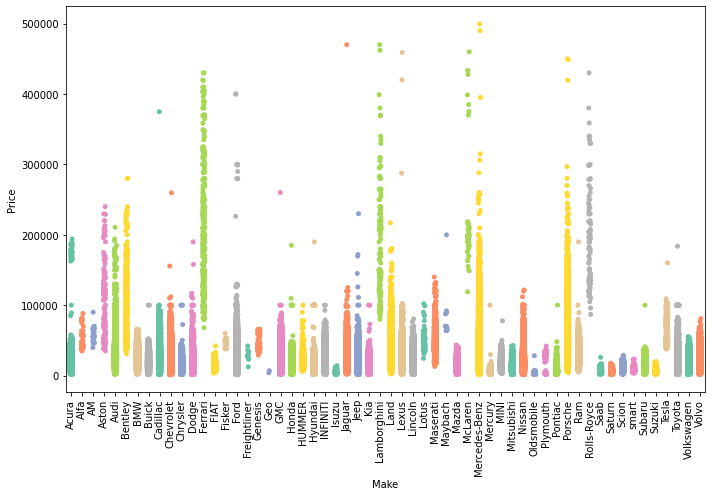

In [91]:
plt.figure(figsize=(10,7))
sns.stripplot(x=dados['Make'], y=dados['Price'], palette='Set2')
plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

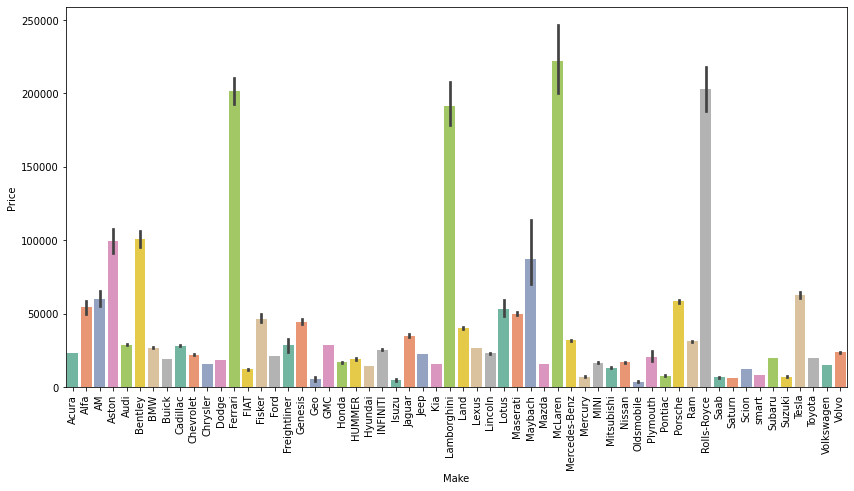

In [92]:
plt.figure(figsize=(14,7))
sns.barplot(x=dados['Make'], y=dados['Price'], palette='Set2')
plt.xticks(rotation=90);

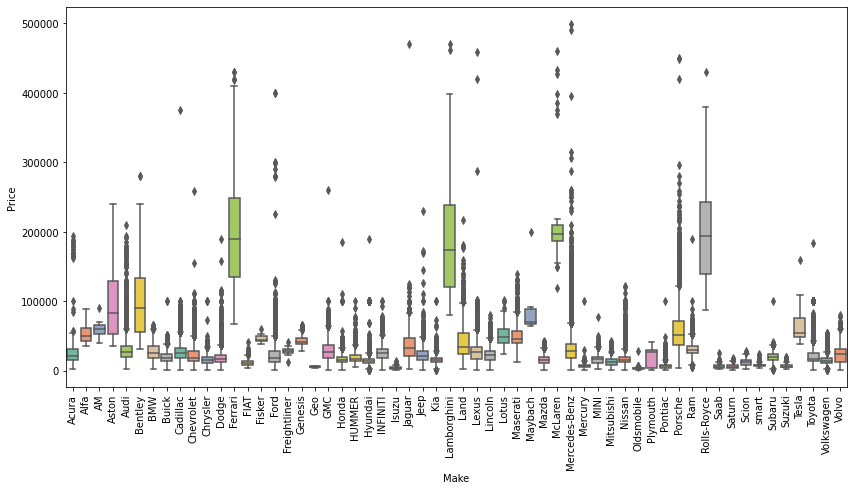

In [93]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Make'], y=dados['Price'], palette='Set2')
plt.xticks(rotation=90);

## Qual o modelo mais frequente?

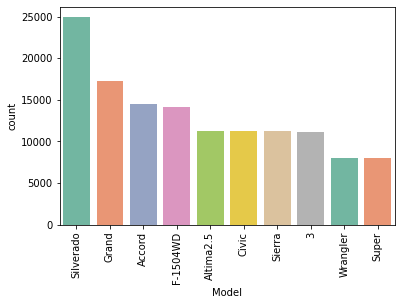

In [94]:
# os dez modelos mais frequentes
sns.countplot(x=dados['Model'],order=dados['Model'].value_counts().index[0:10], palette='Set2')
plt.xticks(rotation=90);
plt.show()

## Qual o preço máximo, mínimo, médio, mediano e a variância do preço dos carros?

In [95]:
print('Preço Máximo:',dados['Price'].max())
print('Preço Mínimo:',dados['Price'].min())
print('Preço Médio:',dados['Price'].mean())
print('Preço Mediano:',dados['Price'].median())
print('Variancia do Preço:',dados['Price'].std())

Preço Máximo: 499500
Preço Mínimo: 1500
Preço Médio: 21464.323952108458
Preço Mediano: 18500.0
Variancia do Preço: 13596.35080793993


## Qual a idade máxima e mínima do carro? Quantos carros tem por quantidade de anos?

In [96]:
dados['AgeCar'] = 2022 - dados['Year']

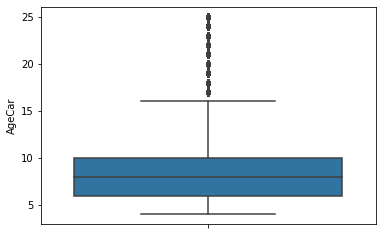

In [97]:
sns.boxplot(y=dados['AgeCar'])

In [98]:
# carros com idade antiga e recente?
print('Qual a idade mais antiga dos carros usados?')
print('----',dados['AgeCar'].max(),'----')

print('Qual a idade recente dos carros usados?')
print('----',dados['AgeCar'].min(),'----')

print('Qual a idade média dos carros usados ?')
print('----',dados['AgeCar'].mean(),'----')

print('Quantos carros usados temos por idade?')
print(dados['AgeCar'].value_counts())

Qual a idade mais antiga dos carros usados?
---- 25 ----
Qual a idade recente dos carros usados?
---- 4 ----
Qual a idade média dos carros usados ?
---- 8.710903282744116 ----
Quantos carros usados temos por idade?
8     162424
7     157513
6     132128
5      91603
9      74697
10     49764
11     39768
12     27538
14     24712
15     21171
13     19061
16     15079
17     11005
18      8117
19      5649
20      3800
21      2584
22      1933
23      1254
4        922
24       774
25       596
Name: AgeCar, dtype: int64


## Carros acima e abaixo da média

In [99]:
# carros usados abaixo da média
baixos_usados = dados[dados['Price'] < 21464]
# carros usados acima da média
acima_usados = dados[dados['Price'] > 21464]

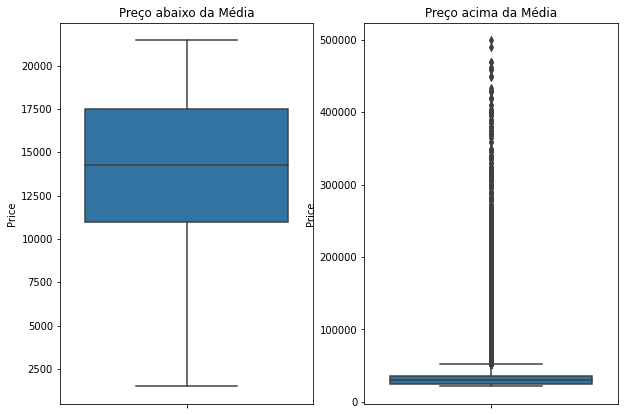

In [100]:
fig, axes = plt.subplots(1,2,figsize=(10,7))
sns.boxplot(y=baixos_usados['Price'], ax=axes[0])
axes[0].set_title('Preço abaixo da Média')
sns.boxplot(y=acima_usados['Price'],ax=axes[1])
axes[1].set_title('Preço acima da Média')

plt.show()

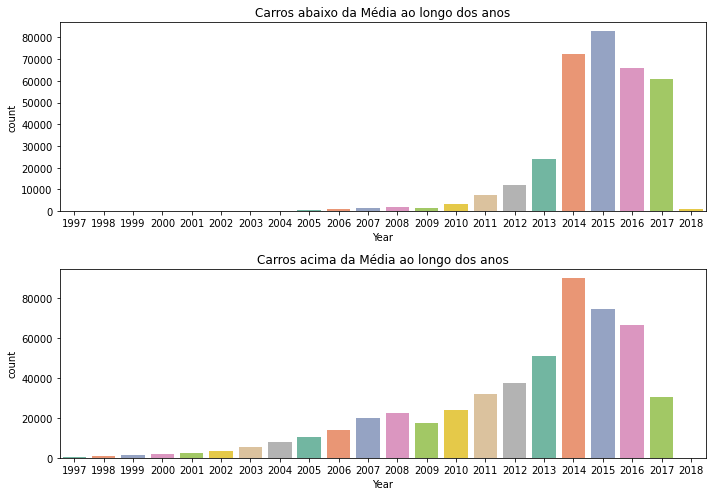

In [101]:
fig,axes= plt.subplots(2,1, figsize=(10,7))

sns.countplot(x=acima_usados['Year'],ax=axes[0], palette='Set2')
axes[0].set_title('Carros abaixo da Média ao longo dos anos')
sns.countplot(x=baixos_usados['Year'],ax=axes[1], palette='Set2')
axes[1].set_title('Carros acima da Média ao longo dos anos')

plt.tight_layout()
plt.show()

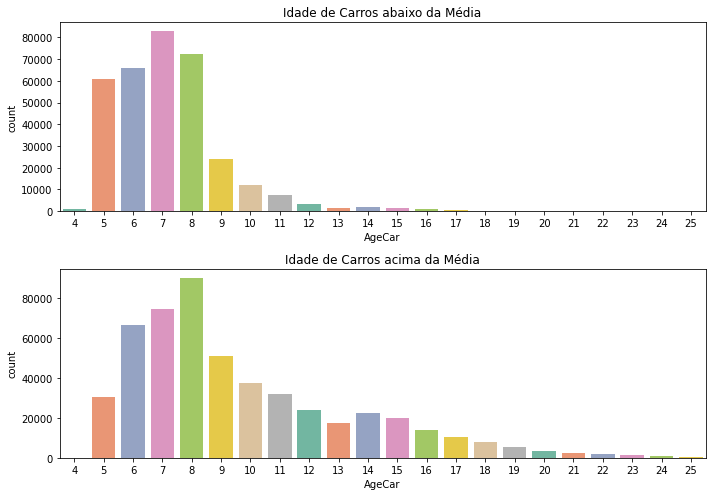

In [102]:
fig,axes= plt.subplots(2,1, figsize=(10,7))

sns.countplot(x=acima_usados['AgeCar'],ax=axes[0], palette='Set2')
axes[0].set_title('Idade de Carros abaixo da Média')
sns.countplot(x=baixos_usados['AgeCar'],ax=axes[1], palette='Set2')
axes[1].set_title('Idade de Carros acima da Média')

plt.tight_layout()
plt.show()

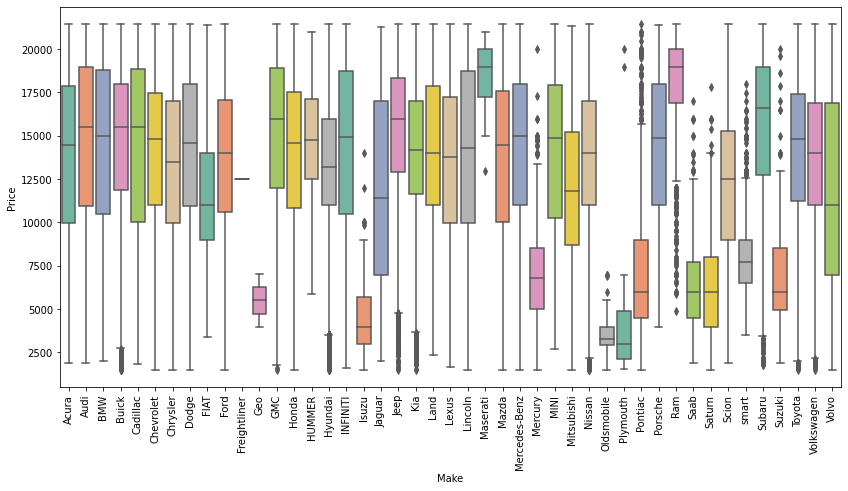

In [103]:
plt.figure(figsize=(14,7))
sns.boxplot(x=baixos_usados['Make'], y=baixos_usados['Price'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

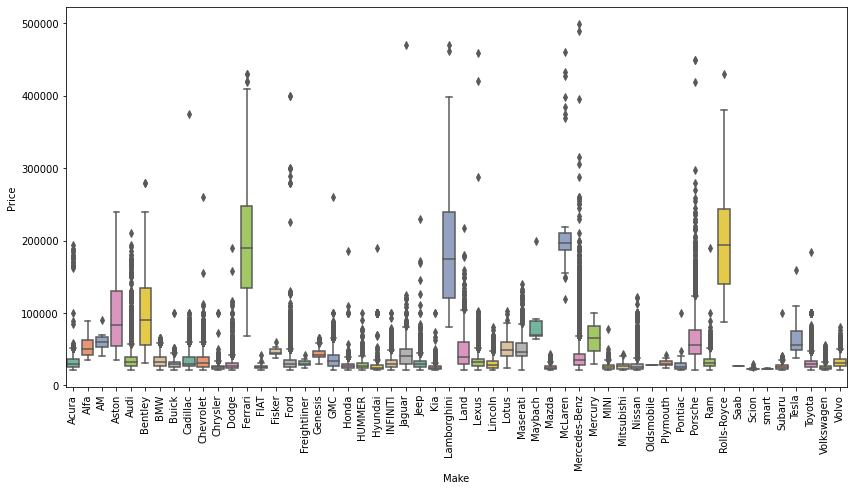

In [104]:
plt.figure(figsize=(14,7))
sns.boxplot(x=acima_usados['Make'], y=acima_usados['Price'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

## Qual o valor dos carros abaixo da média por idade?

Preço total dos carros usados abaixo da média


,Price
AgeCar,
8,1395529490
7,1187777858
6,1067410121
9,730138766
5,536810136
10,502337575
11,425940249
12,296223019
14,246286498


Média do preço dos carros usados abaixo da média


,Price
AgeCar,
4,18846.583333
5,17497.070926
6,16071.097007
7,15889.792217
8,15480.769973
9,14347.955628
10,13365.729433
11,13273.301620
12,12239.609082


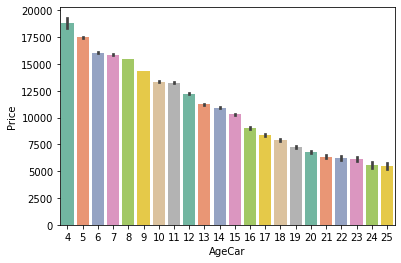

In [117]:
preco_baixo = baixos_usados[['Price','AgeCar']].groupby('AgeCar').sum()
preco_baixo_mean = baixos_usados[['Price','AgeCar']].groupby('AgeCar').mean()

print('Preço total dos carros usados abaixo da média')
display(preco_baixo.sort_values('Price',ascending=False))
print('Média do preço dos carros usados abaixo da média')
display(preco_baixo_mean.sort_values('Price',ascending=False))

sns.barplot(x=baixos_usados['AgeCar'], y=baixos_usados['Price'], palette='Set2')

## Qual o valor dos carros acima da média por idade?

Preço total dos carros usados acima da média


,Price
AgeCar,
7,2753825022
6,2293467356
8,2201634827
5,2193248856
9,706463099
10,363856020
11,222664327
12,96289393
14,68228886


Média dos preços dos carros usados acima da média


,Price
AgeCar,
25,81527.512821
24,62716.153846
20,43384.356164
4,42000.544543
22,37839.897436
5,36000.342334
19,35675.130233
6,34903.928837
16,34110.014690


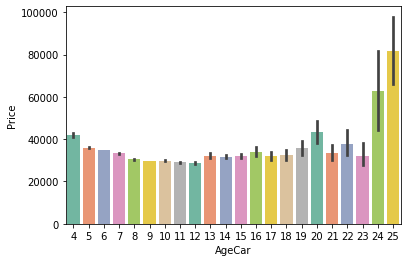

In [118]:
preco_acima = acima_usados[['Price','AgeCar']].groupby('AgeCar').sum()
preco_acima_mean = acima_usados[['Price','AgeCar']].groupby('AgeCar').mean()

print('Preço total dos carros usados acima da média')
display(preco_acima.sort_values('Price',ascending=False))
print('Média dos preços dos carros usados acima da média')
display(preco_acima_mean.sort_values('Price',ascending=False))

sns.barplot(x=acima_usados['AgeCar'], y=acima_usados['Price'], palette='Set2')

## Qual o total do preço dos carros por idade?



In [107]:
# preço por idade
preco_idade = dados[['Price','AgeCar']].groupby('AgeCar').sum()
preco_idade.sort_values('Price',ascending=False)

,Price
AgeCar,
7,3941602880
8,3597185781
6,3360920405
5,2730058992
9,1436601865
10,866193595
11,648604576
12,392512412
14,314515384


## Quilometragem por idade, preço, marca

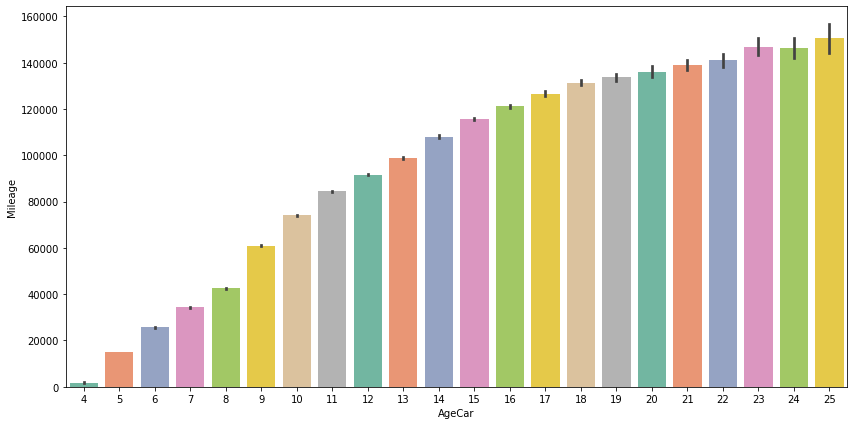

In [108]:
plt.figure(figsize=(14,7))

sns.barplot(x=dados['AgeCar'], y=dados['Mileage'], palette='Set2')

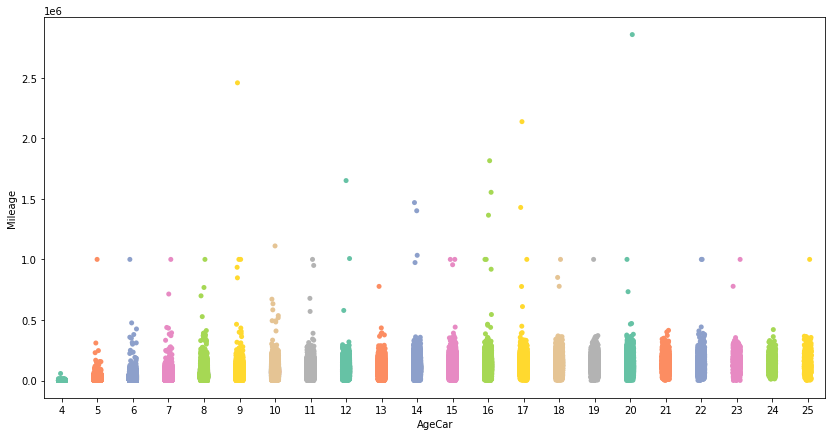

In [109]:
plt.figure(figsize=(14,7))
sns.stripplot(x=dados['AgeCar'], y=dados['Mileage'], palette='Set2')

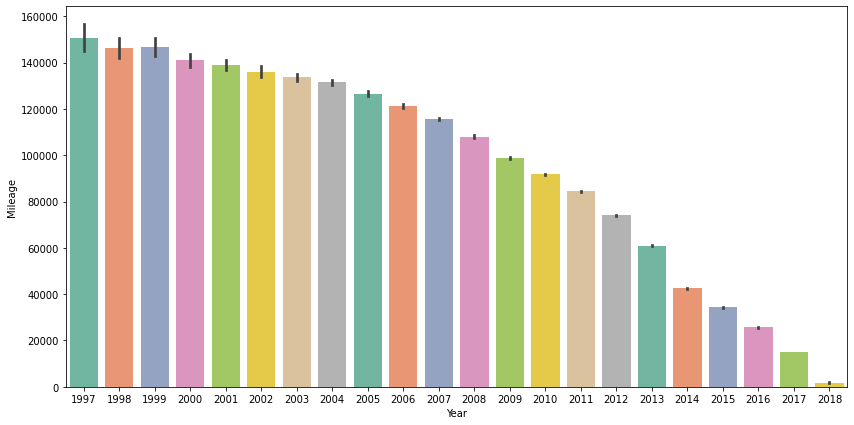

In [110]:
plt.figure(figsize=(14,7))
sns.barplot(x=dados['Year'], y=dados['Mileage'], palette='Set2')

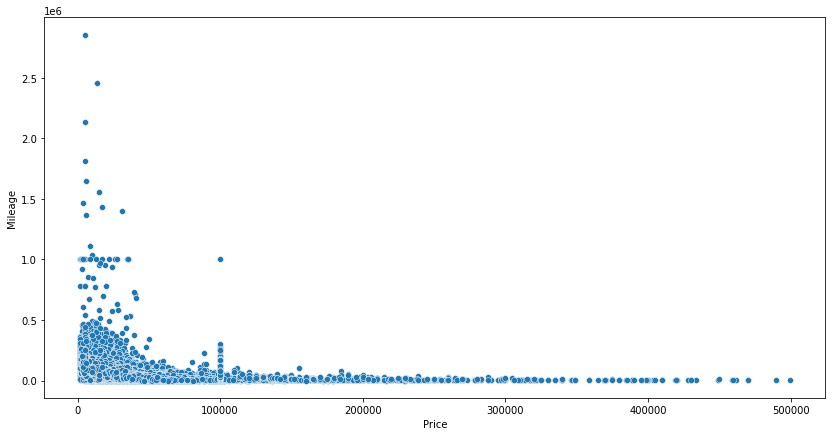

In [111]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=dados['Price'], y=dados['Mileage'])

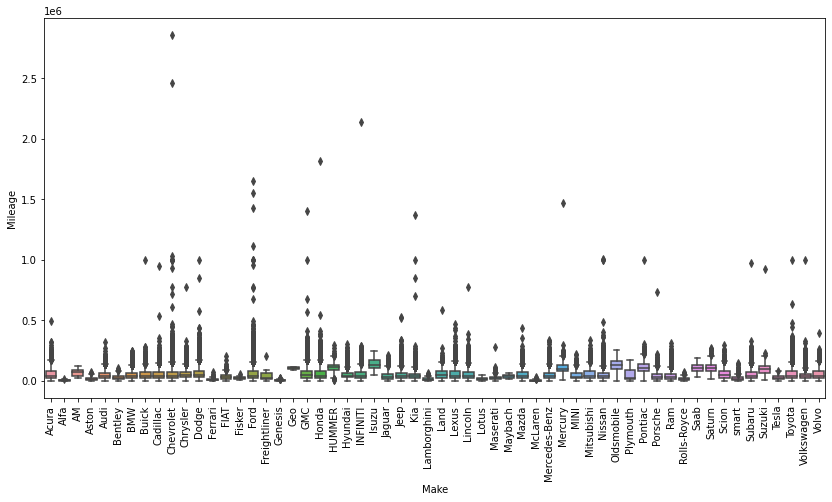

In [112]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Make'], y=dados['Mileage'])
plt.xticks(rotation=90);

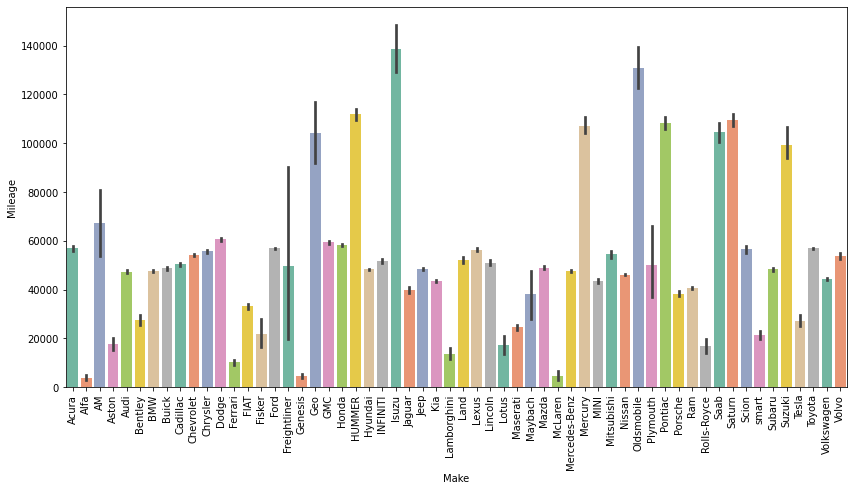

In [113]:
plt.figure(figsize=(14,7))
sns.barplot(x=dados['Make'], y=dados['Mileage'], palette='Set2')
plt.xticks(rotation=90);

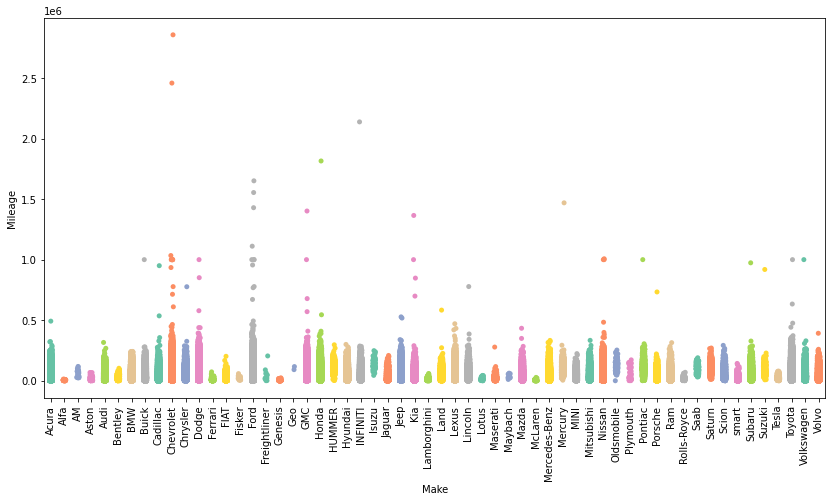

In [114]:
plt.figure(figsize=(14,7))
sns.stripplot(x=dados['Make'], y=dados['Mileage'], palette='Set2')
plt.xticks(rotation=90);

# Outliers

In [50]:
# criando função para retirada de outliers
def drop_outliers(data,col):
    iqr = 1.5 * (np.percentile(data[col], 75) - np.percentile(data[col], 25))
    data.drop(data[data[col] > (iqr + np.percentile(data[col], 75))].index, inplace=True)
    data.drop(data[data[col] < (np.percentile(data[col], 25) - iqr)].index, inplace=True)


In [51]:
drop_outliers(dados,'Price')
drop_outliers(dados,'Mileage')
drop_outliers(dados,'AgeCar')


# Preparação dos Dados

In [52]:
df = dados.copy()
df.drop('AgeCar',axis=1, inplace=True)

In [53]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [54]:
le = LabelEncoder()
cols = ['Year','City', 'State', 'Vin', 'Make', 'Model']
encode = list(cols)
df[encode] = df[encode].apply(lambda col: le.fit_transform(col))
df[encode].head()

,Year,City,State,Vin,Make,Model
0,8,646,49,3620,0,935
1,7,1259,39,3356,0,934
2,7,646,49,3618,0,935
3,8,2489,6,3473,0,934
4,10,1230,50,16,0,937


In [55]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,8,35725,646,49,3620,0,935
1,10888,7,19606,1259,39,3356,0,934
2,8995,7,48851,646,49,3618,0,935
3,10999,8,39922,2489,6,3473,0,934
4,14799,10,22142,1230,50,16,0,937


## Separando o conjunto de dados

In [56]:
y = df['Price']
x = df.drop('Price', axis=1)

In [57]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(x,y)

for i, column in enumerate(df.drop('Price', axis=1)):
  print('Feature {}:{}'.format(column, dt.feature_importances_[i]))

Feature Year:0.18717526648803337
Feature Mileage:0.0825622503883503
Feature City:0.01122802502758822
Feature State:0.008951642076467398
Feature Vin:0.33026881284501575
Feature Make:0.15714596467481864
Feature Model:0.2226680384997263


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [59]:
x_train

,Year,Mileage,City,State,Vin,Make,Model
121343,5,111931,707,51,204879,8,1884
772986,8,27367,1659,55,631497,45,1376
320434,9,63378,1213,21,95949,13,709
530660,11,33393,450,6,692730,24,1760
740982,11,11710,2398,55,588387,42,520
...,...,...,...,...,...,...,...
286422,11,13384,1529,18,140173,13,1880
408484,4,87524,1108,32,498692,18,333
142789,7,142229,1272,49,396777,8,1716
742706,9,42560,742,36,585142,42,1977


In [60]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Modelos

In [61]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_bag= lr.predict(x_test)
print("Accuracy on Traing set: ",lr.score(x_train,y_train))
print("Accuracy on Testing set: ",lr.score(x_test,y_test))

Accuracy on Traing set:  0.2501282488811065
Accuracy on Testing set:  0.24759647704577603


## Desicion Tree

In [62]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_forest= dt.predict(x_test)
print("Accuracy on Traing set: ",dt.score(x_train,y_train))
print("Accuracy on Testing set: ",dt.score(x_test,y_test))

Accuracy on Traing set:  0.9999830867088453
Accuracy on Testing set:  0.9042679637979795


In [71]:
dt = DecisionTreeRegressor(random_state=42)

params = {
    'max_depth':[3,4,5,6,7,8,9]
}

grid_search = GridSearchCV(estimator = dt, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 9}

In [72]:
dt = DecisionTreeRegressor(max_depth=9)
dt.fit(x_train, y_train)
y_pred_forest= dt.predict(x_test)
print("Accuracy on Traing set: ",dt.score(x_train,y_train))
print("Accuracy on Testing set: ",dt.score(x_test,y_test))

Accuracy on Traing set:  0.6296524455386672
Accuracy on Testing set:  0.627513385097187


## Random Forest

In [63]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)

y_pred_forest= forest.predict(x_test)

y_pred = forest.predict(x_train)

print('Acúracia do Treino:', forest.score(x_train, y_train))
print('Acúracia do R2 score precisão do treino:', r2_score(y_train, y_pred))
print()
print('Acúracia do Teste:', forest.score(x_test, y_test))
print()
print('RSME do Treino:', sqrt(mean_squared_error(y_train, y_pred)))
print('RSME de Teste:', sqrt(mean_squared_error(y_test, forest.predict(x_test))))
print()
print('MAE do Treino:', mean_squared_error(y_train, y_pred))
print('MAE de Teste:', mean_squared_error(y_test, forest.predict(x_test)))

Acúracia do Treino: 0.9926946737653185
Acúracia do R2 score precisão do treino: 0.9926946737653185

Acúracia do Teste: 0.9481996855541868

RSME do Treino: 782.9291887510335
RSME de Teste: 2085.3815099111234

MAE do Treino: 612978.1145983514
MAE de Teste: 4348816.041879198


In [ ]:
forest = RandomForestRegressor()

params = {
    'max_depth':[3,4,5,6],
    'n_estimators':[10,50,100,300],
    'max_features':[2,3]
}

grid_search = GridSearchCV(estimator = forest, param_grid=params, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 100}

In [64]:
forest = RandomForestRegressor(max_depth=6,max_features=3,n_estimators=100, random_state=42, n_jobs=-1)
forest.fit(x_train, y_train)
print("Accuracy on Traing set: ",forest.score(x_train,y_train))
print("Accuracy on Testing set: ",forest.score(x_test,y_test))

Accuracy on Traing set:  0.4606466779883853
Accuracy on Testing set:  0.4585819881458033


- Pelo visto, otimizando o modelo de Random Forest fez o resultado piorar. Vou usar o modelo anterior do Forest sem a otimização, já que ele obteve bons resultados.

# Visualizando o gráfico

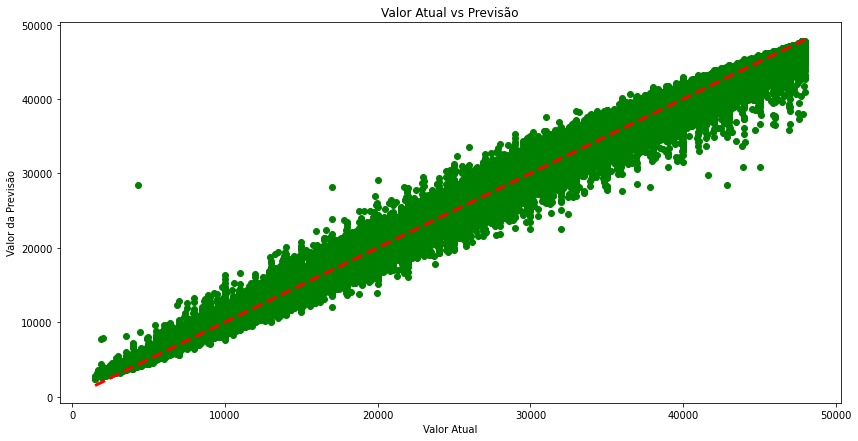

In [65]:
plt.figure(figsize=(14,7))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)

plt.xlabel('Valor Atual')
plt.ylabel('Valor da Previsão')
plt.title('Valor Atual vs Previsão')
plt.show()